## Portada

Universidad Autónoma de Querétaro

Maestría en Ciencias en Inteligencia Artificial

Materia - Tópicos Selectos IV | Machine Learning

Profesor - Dr. Marco Antonio Aceves Fernández

Alumno - Juan Ignacio Ortega Gómez

Expediente - 309236

Actividad - Percolación crítica

Fecha - 11/02/2022

## Introducción

La percolación es el estudio de la conectividad de medios aleatorios y de otras propiedades de subconjuntos conectados de medios aleatorios. 

La Fig. 1.1 ilustra un material poroso, un material con agujeros, poros, de varios tamaños.

Los medios porosos ilustrados en la figura sirven como un modelo fundamental y útil para los medios aleatorios en general. El medio poroso consta de regiones con material y sin material, por lo tanto, es una versión binaria extrema de un medio aleatorio. 

Un material poroso físico real será generado por algún proceso físico, que afectará las propiedades del medio poroso de alguna manera. Por ejemplo, si el material se genera por deposición sedimentaria, los detalles del proceso de deposición pueden afectar la forma y la conectividad de los poros, o las fracturas posteriores pueden generar fracturas rectas además de poros más redondos (Malthe, 2020).

Con esta actividad, se estrá analizando un ejemplo simplificado de un material porosos aleatorio.

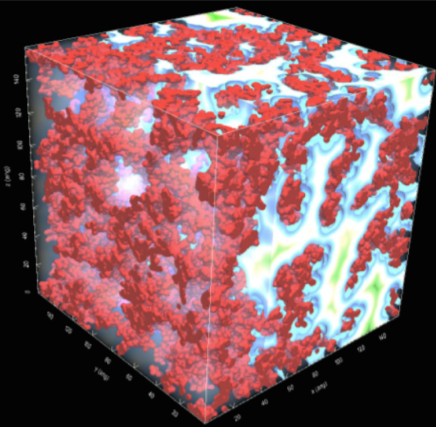

Fig. 1.1 Ilustración de un material poroso a partir de un silicato nanoporoso (SiO2). Los colores dentro de los poros ilustran la distancia a la parte más cercana del sólido (Malthe, 2020). 

La percolación es el estudio de la conectividad. La cuestión más simple que podemos hacer es ¿cuándo se forma un camino de un lado de la muestra al otro?, y por cuándo, se refieren a qué valor de probabilidad (p.) una matriz m logra realizar esta ruta. Vemos que la respuesta depende de cómo definamos la conectividad. Si queremos hacer un camino a lo largo de una figura establecida de un lado a otro, debemos decidir cuándo y cómo se conectan dos sitios. (Malthe, 2020)

En esta actividad, se pretende encontrar la percolación crítica de una matriz que simule un objeto al cual se pretende atravesar de arriba a abajo según cierta probabilidad de zonas obstruidas. Para lo antes mencionado, se utilizará la conectividad del vecino más cercano, con distintas consideraciones de prioridad y constantes de tamaño y movimiento, las cuales, se irán explicando de a poco en cada apartado. Además de una programación estructurada en forma de máquina de estados, para una mejor comprensión.

## Desarrollo

Generamos una función para graficar el status de la coladera.

In [3]:
def graficar(matrix):
  import matplotlib.pyplot as plt
  import matplotlib.colors as cls
  from IPython import display

  fig, ax = plt.subplots()
  colormap = cls.ListedColormap(["black", "red", "white"])
  im = ax.imshow(matrix, cmap = colormap)
  ax.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], minor = True)
  ax.set_yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], minor = True)
  ax.grid(which='minor', color='black', linestyle='-', linewidth = 1)
  fig.tight_layout()
  display.clear_output(wait=True)
  plt.show()

Además, se realiza una función para reinicar el status de la coladera.

In [4]:
def reiniciar(matrix, longitm):
  import numpy as np

  iterator = 0
  while iterator <= (longitm - 1):
    positions = []
    positions.append(np.where(matrix[iterator] == 1))
    for element in positions:
      matrix[iterator][element] = 2
    iterator += 1

Definimos el tamaño de la coladera con la cantidad de cuadros (pixeles) de esta, además de definir el porcentaje de obstrucción.

In [227]:
m = 10
n = 10
tot_vent = m * n
prob_tap = 40

Generamos de forma aleatoria los números de los pixeles que representarán las partes obstruidas de la coladera.

In [232]:
import random as rd

cant_ven_tap = ((tot_vent) * prob_tap) / 100
cont = 0
ven_tap = []
while cont <= (cant_ven_tap - 1):
  num_prop = rd.randint(0, (tot_vent - 1))
  if num_prop not in ven_tap:
    ven_tap.append(num_prop)
    cont += 1

Generamos un array con cada uno de los pixeles que representan a la coladera, tomando en cuenta los pixeles que estan obstruidos.

Para poder hacer su representación visual correcta de los pixeles, se tomaron de la siguiente manera:

Pixel = 0 --> Bloqueado

Pixel = 1 --> Pasando agua

Pixel = 2 --> Desbloqueado

In [233]:
import numpy as np
col_ini = []
countm = 0
while countm <= (m - 1):
  fila = []
  countn = 0
  while countn <= (n - 1):
    num_ven = (countm * 10) + countn
    if num_ven in ven_tap:
      num = 0
    else:
      num = 2
    fila.append(num)
    countn += 1
  col_ini.append(fila)
  countm += 1

col = np.array(col_ini)

Mostramos la coladera cuadrada con los taponamientos.

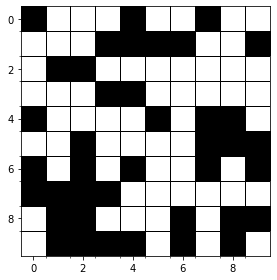

In [234]:
graficar(col)

Comando para reiniciar, es decir, eliminar las celdas rojas y dejándolas en blanco nuevamente:

In [215]:
reiniciar(col, m)

Generamos una máquina de estados para poder buscar si la coladera percola, dándole prioridad al pixel (recuadro) de bajada, luego al de la derecha y finalmente al de la izquierda.

Al final arroja el resultado sobre si percola o no lo hace y va mostrando en tiempo real el recorrido del líquido, dejando al final el camino de percolación o el último camino que se siguió para determinar la no percolación.

Los estados son descritos dentro del código, como se muestra a continuación:

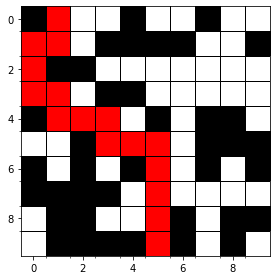

Percola


In [235]:
import matplotlib.pyplot as plt

result = 'Sin probar'
countm = 0
countn = 0
estado = 0
while countm <= (m - 1):
  if (col[countm][countn] == 2) and (estado == 0): #Si se puede bajar.
    col[countm][countn] = 1
    countm += 1
    graficar(col)
    if countm == m:
      result = 'Percola'
  elif (col[countm][countn] == 1) and (estado == 0): #Si estas regresando de abajo hacia la primer fila, sigue hacia la derecha.
    col[countm][countn] = 2
    countn += 1
    if countn == n:
          result = 'No percola'
          countm = m
    graficar(col)
  elif (col[countm][countn] == 0) and (estado == 0) and (countm == 0): #Si no se puede bajar al inicio, muevete a la derecha (Excepto si llegó al final, en ese momento se termina y no percola).
    countn += 1
    if countn == n:
      result = 'No percola'
      countm = m
  elif (col[countm][countn] == 0) and (estado == 0) and (countm != 0): #Si no se puede bajar, regresa.
    countm -= 1
    if countm == 0:
      estado = 0
    else:
      estado = 1
  elif (col[countm][countn] != 0) and (estado == 1): #Si estas regresando de abajo, intenta a la derecha (Excepto cuando se llega al límite, entonces se va directo al estado 3).
    countn += 1 
    if countn > (n - 1):
      countn -= 1
      estado = 3
    elif col[countm][countn] == 1:
      countn -= 1
      estado = 3
    elif col[countm][countn] != 1:
      estado = 2  
  elif (col[countm][countn] == 0) and (estado == 2): #Si no se puede a la derecha, regresa (Excepto si llegó al final, en ese momento se termina y no percola).
    countn -= 1
    estado = 3
    if (countn == (n - 1)) and (countm == 0):
      result = 'No percola'
      countm = m
  elif (col[countm][countn] == 2) and (estado == 2): #Si se puede a la derecha, baja.
    col[countm][countn] = 1
    countm += 1
    estado = 0
    graficar(col)
  elif (col[countm][countn] != 0) and (estado == 3): #Si estas regresando de la derecha (o si vienes de un límite derecho), intenta a la izquierda (Excepto cuando se llega al límite, entonces se va directo al estado 5).
    countn -= 1
    if countn < 0:
      countn += 1
      estado = 5
    elif col[countm][countn] == 1:
      countn += 1
      estado = 5
    elif col[countm][countn] != 1:
      estado = 4
  elif (col[countm][countn] == 0) and (estado == 4): #Si no se puede a la izquierda, regresa.
    countn += 1
    estado = 5
  elif (col[countm][countn] == 2) and (estado == 4): #Si se puede a la izquierda, baja.
    col[countm][countn] = 1
    countm += 1
    estado = 0
    graficar(col)
  elif (col[countm][countn] != 0) and (estado == 5): #Si estas regresando de la izquierda, regresa un paso anterior.
    col[countm][countn] = 2
    if (countn < (n - 1)) and (col[countm][countn + 1] == 1): #regresa hacia la derecha y repite el estado 5.
      countn += 1
    elif (countn > 0) and (col[countm][countn - 1] == 1): #regresa hacia la izquierda.
        countn -= 1
        if col[countm][countn - 1] != 1:
          estado = 6
    elif col[countm - 1][countn] == 1: #regresa hacia arriba.
      countm -= 1
      estado = 1
      if countm == 0: #Si vas a regresar al inicio ve directo a la derecha
        col[countm][countn] = 2
        countn += 1
        estado = 0
        if countn == n:
          result = 'No percola'
          countm = m
    graficar(col)
  elif (col[countm][countn] != 0) and (estado == 6): #Si estas regresando desde la derecha, intenta a la izquierda (Excepto cuando se llega al límite, entonces se va directo al estado 5).
    countn -= 1
    estado = 4
    if countn < 0:
      countn += 1
      estado = 5

print(result)

Luego de diversas pruebas, colocamos todo en una sola función para utilizarla durante la búsqueda del porcentaje de percolación crítica (Quitamos la sección de graficar).

In [1]:
def PruebaDePercolacion(Min, Nin, Prob):
  m = Min
  n = Nin
  tot_vent = m * n
  prob_tap = Prob

  import random as rd

  cant_ven_tap = ((tot_vent) * prob_tap) / 100
  cont = 0
  ven_tap = []
  while cont <= (cant_ven_tap - 1):
    num_prop = rd.randint(0, (tot_vent - 1))
    if num_prop not in ven_tap:
      ven_tap.append(num_prop)
      cont += 1

  import numpy as np
  col_ini = []
  countm = 0
  while countm <= (m - 1):
    fila = []
    countn = 0
    while countn <= (n - 1):
      num_ven = (countm * 10) + countn
      if num_ven in ven_tap:
        num = 0
      else:
        num = 2
      fila.append(num)
      countn += 1
    col_ini.append(fila)
    countm += 1

  col = np.array(col_ini)

  import matplotlib.pyplot as plt

  result = 'Sin probar'
  countm = 0
  countn = 0
  estado = 0
  while countm <= (m - 1):
    if (col[countm][countn] == 2) and (estado == 0): #Si se puede bajar.
      col[countm][countn] = 1
      countm += 1
      #graficar(col)
      if countm == m:
        result = 'Percola'
    elif (col[countm][countn] == 1) and (estado == 0): #Si estas regresando de abajo hacia la primer fila, sigue hacia la derecha.
      col[countm][countn] = 2
      countn += 1
      if countn == n:
            result = 'No percola'
            countm = m
      #graficar(col)
    elif (col[countm][countn] == 0) and (estado == 0) and (countm == 0): #Si no se puede bajar al inicio, muevete a la derecha (Excepto si llegó al final, en ese momento se termina y no percola).
      countn += 1
      if countn == n:
        result = 'No percola'
        countm = m
    elif (col[countm][countn] == 0) and (estado == 0) and (countm != 0): #Si no se puede bajar, regresa.
      countm -= 1
      if countm == 0:
        estado = 0
      else:
        estado = 1
    elif (col[countm][countn] != 0) and (estado == 1): #Si estas regresando de abajo, intenta a la derecha (Excepto cuando se llega al límite, entonces se va directo al estado 3).
      countn += 1 
      if countn > (n - 1):
        countn -= 1
        estado = 3
      elif col[countm][countn] == 1:
        countn -= 1
        estado = 3
      elif col[countm][countn] != 1:
        estado = 2  
    elif (col[countm][countn] == 0) and (estado == 2): #Si no se puede a la derecha, regresa (Excepto si llegó al final, en ese momento se termina y no percola).
      countn -= 1
      estado = 3
      if (countn == (n - 1)) and (countm == 0):
        result = 'No percola'
        countm = m
    elif (col[countm][countn] == 2) and (estado == 2): #Si se puede a la derecha, baja.
      col[countm][countn] = 1
      countm += 1
      estado = 0
      #graficar(col)
    elif (col[countm][countn] != 0) and (estado == 3): #Si estas regresando de la derecha (o si vienes de un límite derecho), intenta a la izquierda (Excepto cuando se llega al límite, entonces se va directo al estado 5).
      countn -= 1
      if countn < 0:
        countn += 1
        estado = 5
      elif col[countm][countn] == 1:
        countn += 1
        estado = 5
      elif col[countm][countn] != 1:
        estado = 4
    elif (col[countm][countn] == 0) and (estado == 4): #Si no se puede a la izquierda, regresa.
      countn += 1
      estado = 5
    elif (col[countm][countn] == 2) and (estado == 4): #Si se puede a la izquierda, baja.
      col[countm][countn] = 1
      countm += 1
      estado = 0
      #graficar(col)
    elif (col[countm][countn] != 0) and (estado == 5): #Si estas regresando de la izquierda, regresa un paso anterior.
      col[countm][countn] = 2
      if (countn < (n - 1)) and (col[countm][countn + 1] == 1): #regresa hacia la derecha y repite el estado 5.
        countn += 1
      elif (countn > 0) and (col[countm][countn - 1] == 1): #regresa hacia la izquierda.
          countn -= 1
          if col[countm][countn - 1] != 1:
            estado = 6
      elif col[countm - 1][countn] == 1: #regresa hacia arriba.
        countm -= 1
        estado = 1
        if countm == 0: #Si vas a regresar al inicio ve directo a la derecha
          col[countm][countn] = 2
          countn += 1
          estado = 0
          if countn == n:
            result = 'No percola'
            countm = m
      #graficar(col)
    elif (col[countm][countn] != 0) and (estado == 6): #Si estas regresando desde la derecha, intenta a la izquierda (Excepto cuando se llega al límite, entonces se va directo al estado 5).
      countn -= 1
      estado = 4
      if countn < 0:
        countn += 1
        estado = 5

  return(result)

Finalmente, diseñamos un apartado de código que se encarga de generar 100 pruebas por cada porcentaje de probabilidad de obstrucción, iniciando con un porcentaje de 0 e incrementandolo de 1 en 1. Se considera un entorno de colado de 10x10. El programa arrojará el porcentaje de umbral de percolación una vez se haya llegado al 100% de umbral o el procentaje de efectividad de las 100 pruebas arroje un umbral menor a el 80%. 

Además, en cada iteración, nos proporcionará el porcentaje de efectividad de las 100 pruebas con cada porcentaje de obstrucción.

In [2]:
Porcentaje = 0
porce_efect = 100
while (Porcentaje <= 100) and (porce_efect >= 80):
  NdP = 0
  results = []
  while NdP <= 99:
    temporal_result = PruebaDePercolacion(10, 10, Porcentaje)
    if temporal_result == 'No percola':
      results.append(0)
    else:
      results.append(1)
    NdP += 1
  
  porce_efect = sum(results)

  Porcentaje_parcial = str(Porcentaje)
  Porcentaje_efect_parcial = str(porce_efect)
  print('Con un porcentaje de obstrucción del', Porcentaje_parcial + '%, nos da un porcentaje de efectividad del', Porcentaje_efect_parcial + '%.')

  Porcentaje += 1

Porcentaje_fin = str(Porcentaje - 2)

print('La percolación crítica es igual a', Porcentaje_fin + '%.')

Con un porcentaje de obstrucción del 0%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 1%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 2%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 3%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 4%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 5%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 6%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 7%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 8%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 9%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 10%, nos da un porcentaje de efectividad del 100%.
Con un porcentaje de obstrucción del 11%, 

## Discusión

Una vez realizada la prueba se puede destacar que se reduce considerablemente el porcentaje de efectividad rapidamente, también es relevante menciona que utilizar un taponamiento aleatorio afecta directamente en el porcentaje de efectividad al tener resultados oscilantes mientras se aumentaba el porcentaje de obstrucción. Para terminar, se remarca el umbral de percolación en un 35% de obstrucción, dato que fue aproximadamente similiar durante las pruebas realizadas, iterando el mismo programa final en varias ocaciones. 

## Referencia

Malthe-Sørenssen, A. (2020). Percolation theory using Python. Department of Physics, University of Oslo.